# Midterm Exam-Weiye Li

## Import Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets.samples_generator import make_blobs
from sklearn import mixture
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.linear_model import BayesianRidge
import warnings
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from pymc3 import  *
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import lars_path
from sklearn import datasets
warnings.filterwarnings("ignore")

## Question 1

In order to demonstrate how algorithms work, I limited the dimension of data to be 2 for the sake of visualization. Therefore, I will explore the effects of each advertisement expense (TV, radio, newspaper, TotalAd) toward sales separately.

In [4]:
Advertisement = pd.read_csv('Advertisement.csv')
Advertisement = Advertisement.drop(columns=['Unnamed: 0'])
Columns = ['TV', 'radio', 'newspaper','TotalAd' ]
Response = ['sales']
Advertisement['TotalAd'] = Advertisement[Columns[0:3]].sum(axis=1)
Advertisement.head()

,TV,radio,newspaper,sales,TotalAd
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


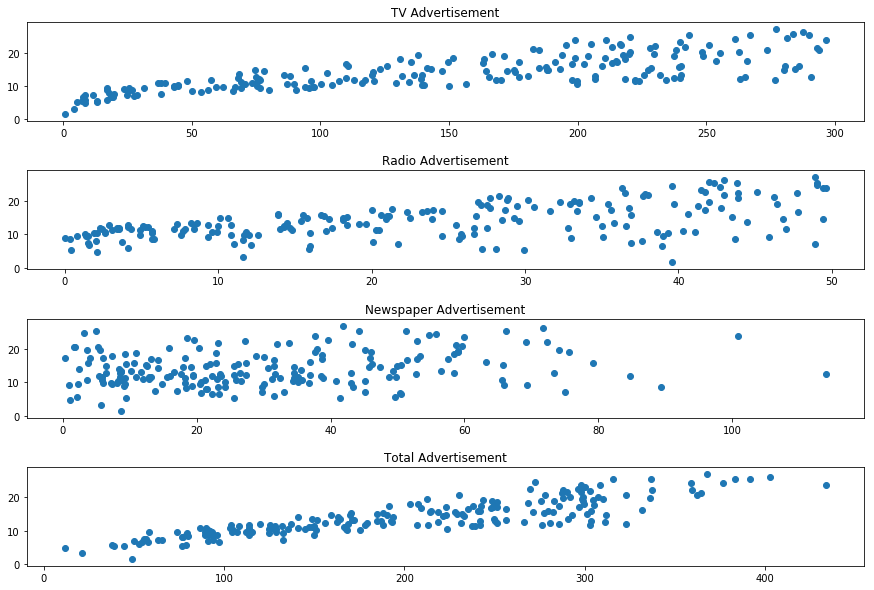

In [5]:

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharey=True,figsize=(15,10))
ax1.scatter(Advertisement[Columns[0]], Advertisement[Response])
ax1.set_title('TV Advertisement')
ax2.scatter(Advertisement[Columns[1]], Advertisement[Response])
ax2.set_title('Radio Advertisement')
ax3.scatter(Advertisement[Columns[2]], Advertisement[Response])
ax3.set_title('Newspaper Advertisement')
ax4.scatter(Advertisement[Columns[3]], Advertisement[Response])
ax4.set_title('Total Advertisement')
f.subplots_adjust(hspace=0.5)
plt.show()

### Gaussian Process Regression and Bayesian Linear Regression

#### Gaussian Process Regression

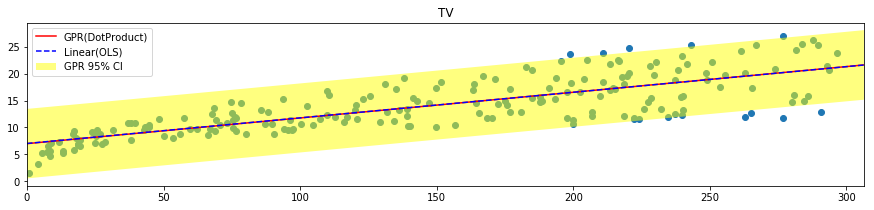

TV
Leave One Out Cross Validation for Gaussian Process Regression
MSE: 10.741345579795306


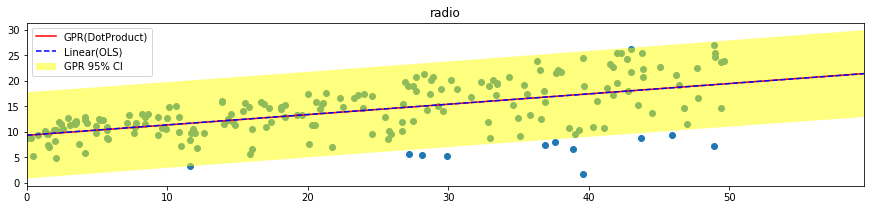

radio
Leave One Out Cross Validation for Gaussian Process Regression
MSE: 18.486137727900438


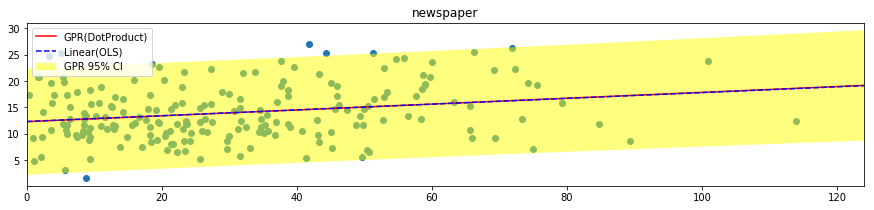

newspaper
Leave One Out Cross Validation for Gaussian Process Regression
MSE: 26.27202446627218


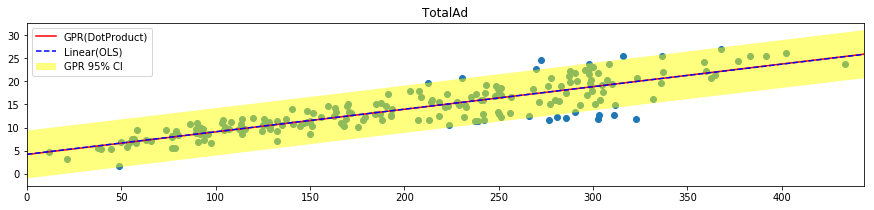

TotalAd
Leave One Out Cross Validation for Gaussian Process Regression
MSE: 6.828091728193715


In [12]:
kernel = DotProduct() + WhiteKernel() #The kernel is chosen based on the shape of data
Y = np.array(Advertisement[Response])
for i in range(4):
    X = np.array(Advertisement[Columns[i]])
    model1 =  GaussianProcessRegressor(kernel=kernel,random_state=0)
    model1.fit(X=X.reshape(len(X),1),y=Y)
    model2 = LinearRegression(fit_intercept=True)
    model2.fit(X=X.reshape(len(X),1), y=Y)
    xfit = np.linspace(0, max(X)+10, 1000)
    yfit1,sigma = model1.predict(xfit[:, np.newaxis],return_std=True)
    yfit2 = model2.predict(xfit[:, np.newaxis])
    plt.figure(figsize=(15,3))
    plt.scatter(X, Y)
    plt.plot(xfit, yfit1,label='GPR(DotProduct)',linestyle='-',c='r')
    plt.plot(xfit, yfit2,label='Linear(OLS)',linestyle='--',c='b')
    yfit1 = np.array(yfit1).reshape(len(yfit1),1)
    sigma = np.array(sigma).reshape(len(sigma),1)
    low = yfit1-1.96*sigma
    high = yfit1+1.96*sigma
    plt.fill_between(xfit, low.ravel(),high.ravel(), facecolor='yellow', alpha=0.5,label='GPR 95% CI')
    plt.xlim(0,max(X)+10)
    plt.legend(loc='upper left')
    plt.title(Columns[i])
    plt.show()
    loo = LeaveOneOut()
    ytests = []
    ypreds = []
    for train_idx, test_idx in loo.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        Y_train, Y_test = Y[train_idx], Y[test_idx]
        model =  GaussianProcessRegressor(kernel=kernel,random_state=0)
        model.fit(X=X_train.reshape(len(X_train),1), y=Y_train)
        Y_pred = model.predict(X_test.reshape(len(X_test),1))
        ytests += list(Y_test)
        ypreds += list(Y_pred)
    rr = metrics.r2_score(ytests, ypreds)
    ms_error = metrics.mean_squared_error(ytests, ypreds)
    print(Columns[i])
    print("Leave One Out Cross Validation for Gaussian Process Regression")
    print("MSE:", ms_error)
        

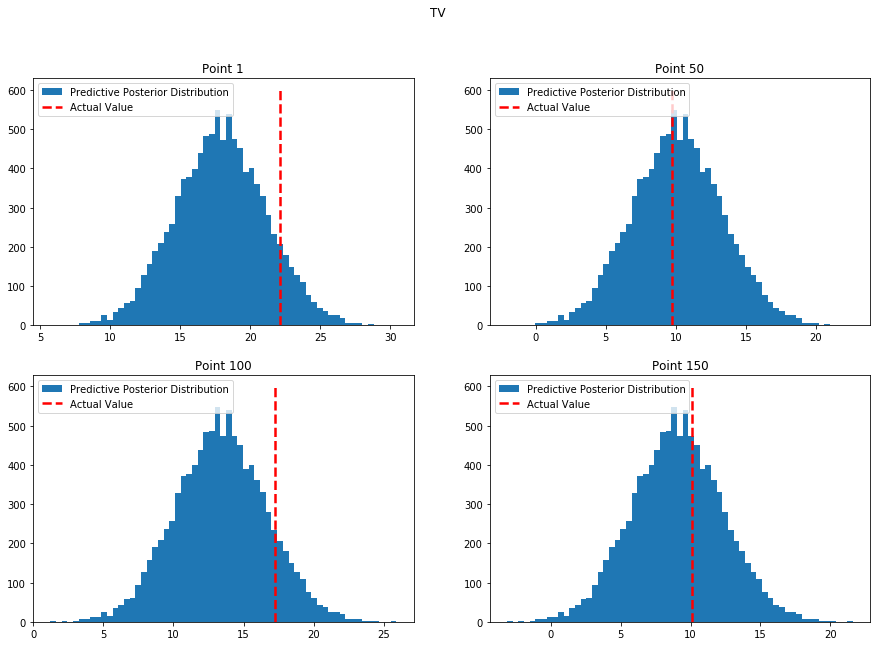

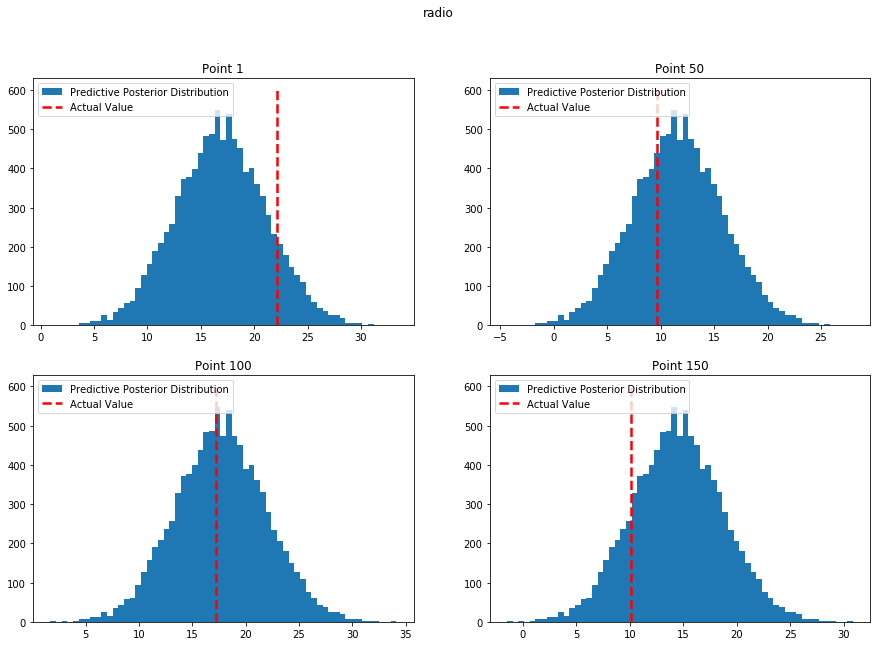

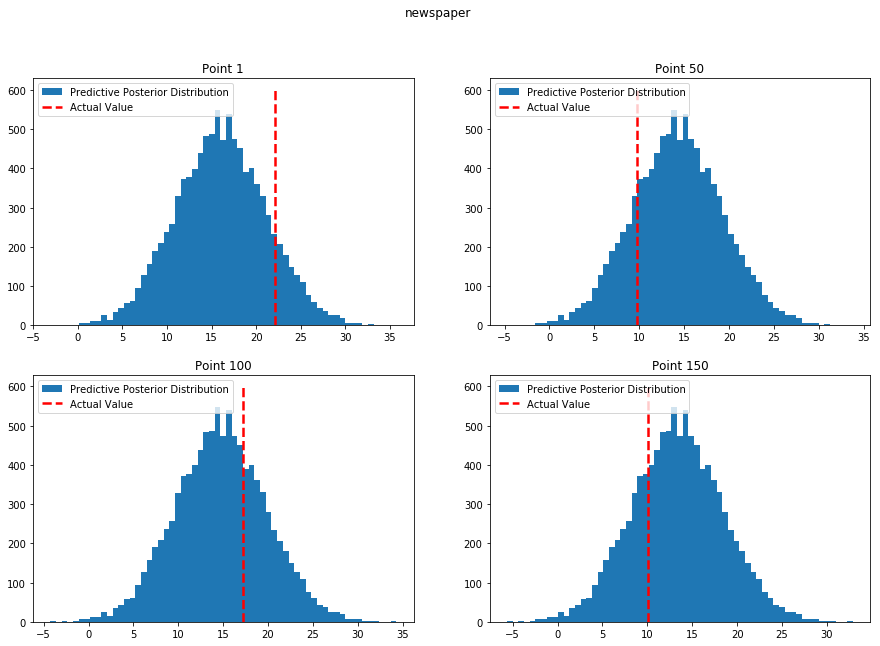

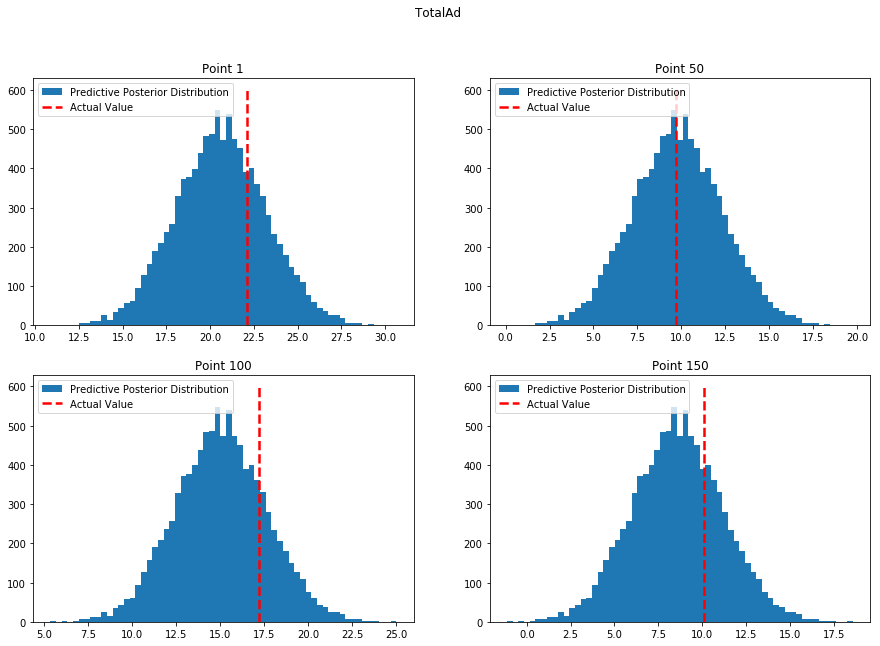

In [29]:
kernel = DotProduct() + WhiteKernel() #The kernel is chosen based on the shape of data
Index = np.array([0,49,99,149])
List = ['Point 1', 'Point 50', 'Point 100', 'Point 150']
Y = np.array(Advertisement[Response])
for i in range(4):
    X = np.array(Advertisement[Columns[i]])
    plt.figure(figsize=(15,10))
    for j in range(4):
        X_train = np.delete(X,Index[j])
        Y_train = np.delete(Y,Index[j])
        X_test = X[Index[j]]
        Y_test = Y[Index[j]]
        model =  GaussianProcessRegressor(kernel=kernel,random_state=0)
        model.fit(X=X.reshape(len(X),1),y=Y)
        Y_simulated = model.sample_y(X_test.reshape(1,-1), n_samples=10000, random_state=0)
        Y_simulated = Y_simulated.flatten()
        plt.subplot(2,2,j+1)
        plt.hist(Y_simulated, bins='auto', label='Predictive Posterior Distribution')
        plt.vlines(x = Y_test, ymin = 0, ymax = 600, linestyles = '--', colors = 'red',label = 'Actual Value',linewidth = 2.5)
        plt.title(List[j])
        plt.legend(loc='upper left')
    plt.suptitle(Columns[i])
    plt.show()

### Bayesian Linear Regression

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, x, Intercept]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [02:17<00:00, 11.28draws/s]
The acceptance probability does not match the target. It is 0.9127715325338712, but should be close to 0.8. Try to increase the number of tuning steps.


Bayesian Linear Regression for TV


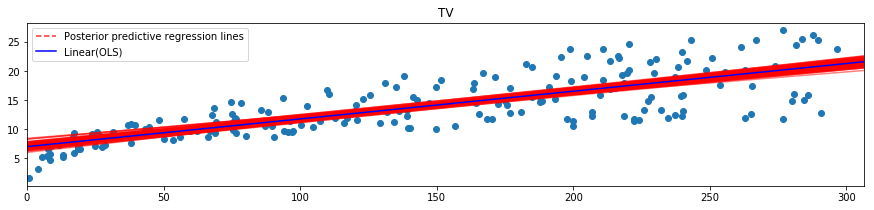

<Figure size 504x504 with 0 Axes>

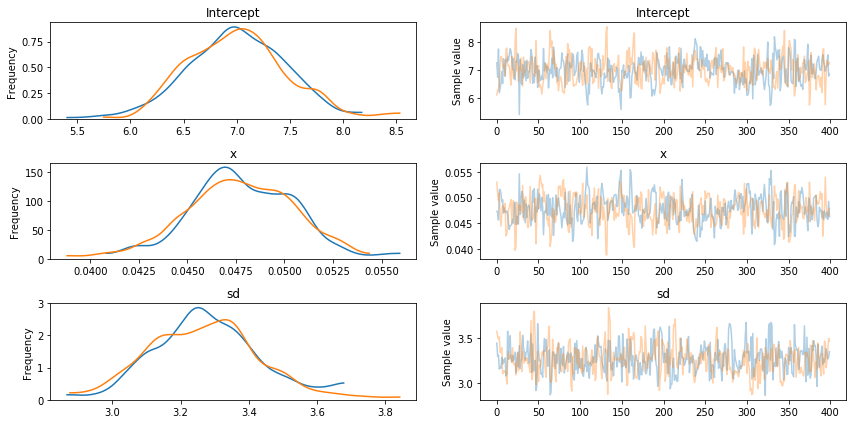

TV
Leave One Out Cross Validation for Bayesian Linear Regression
MSE: 10.741825128928031


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, x, Intercept]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:35<00:00, 20.97draws/s]
The acceptance probability does not match the target. It is 0.8836780957319743, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8828816683378563, but should be close to 0.8. Try to increase the number of tuning steps.


Bayesian Linear Regression for radio


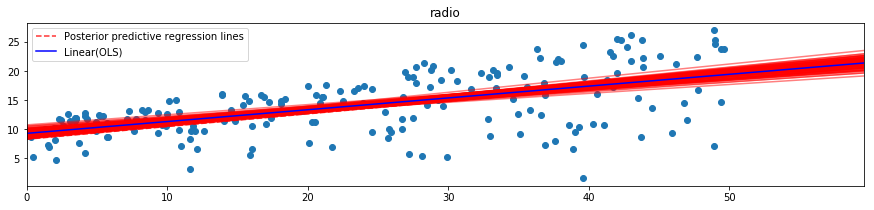

<Figure size 504x504 with 0 Axes>

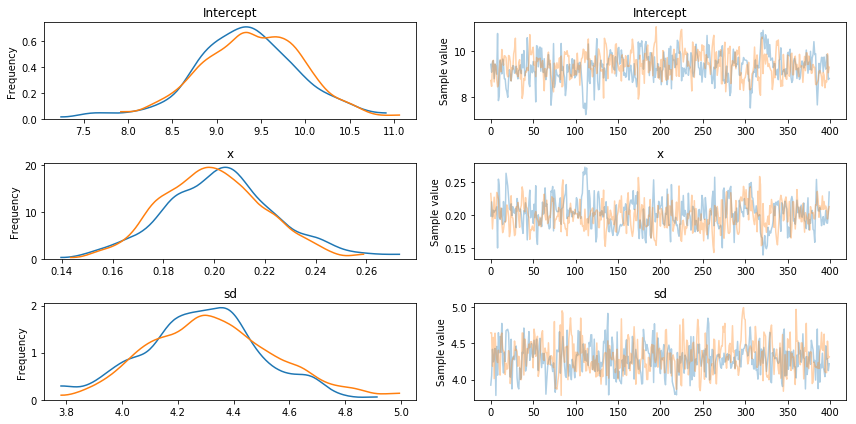

radio
Leave One Out Cross Validation for Bayesian Linear Regression
MSE: 18.489614329337


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, x, Intercept]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:40<00:00, 16.80draws/s]


Bayesian Linear Regression for newspaper


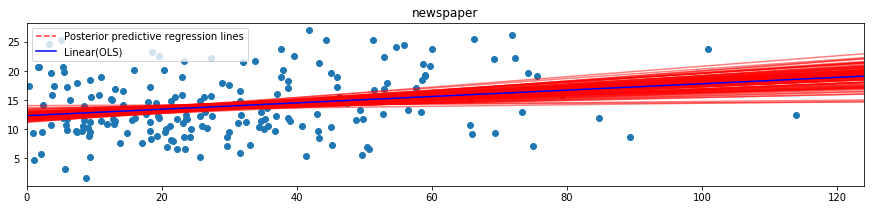

<Figure size 504x504 with 0 Axes>

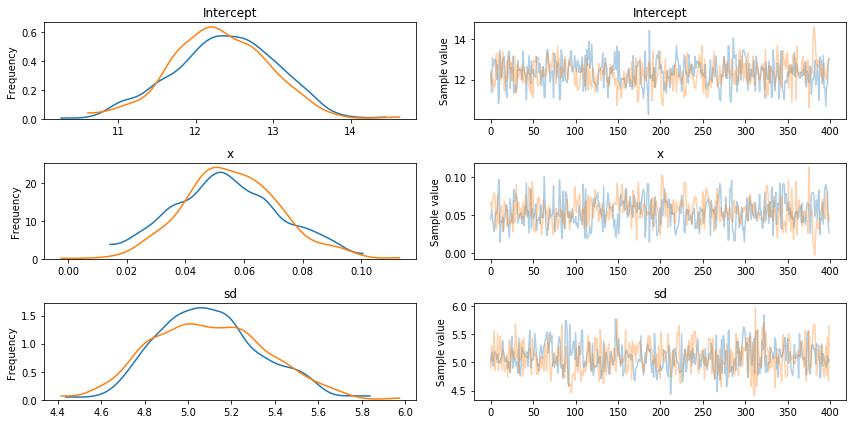

newspaper
Leave One Out Cross Validation for Bayesian Linear Regression
MSE: 26.309267079527213


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, x, Intercept]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [04:45<00:00,  7.01draws/s]
The acceptance probability does not match the target. It is 0.9023262181338216, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8837106929962285, but should be close to 0.8. Try to increase the number of tuning steps.


Bayesian Linear Regression for TotalAd


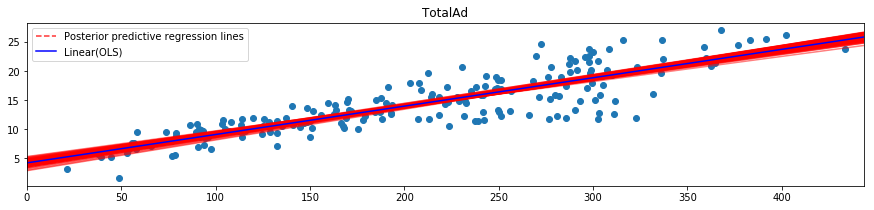

<Figure size 504x504 with 0 Axes>

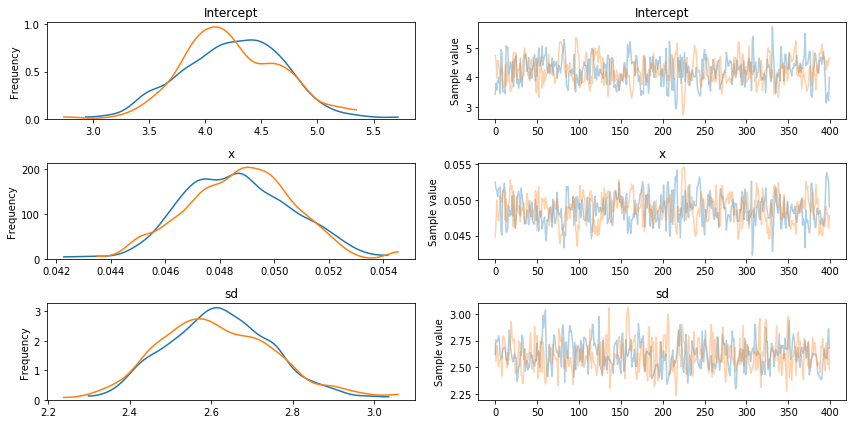

TotalAd
Leave One Out Cross Validation for Bayesian Linear Regression
MSE: 6.827835167800235


In [27]:
Y = np.array(Advertisement[Response])
for i in range(4):
    X = np.array(Advertisement[Columns[i]])
    data = dict(x=X, y=Y)
    with Model() as model:
        glm.GLM.from_formula('y ~ x', data)
        trace = sample(500, cores=2)  # draw posterior samples using NUTS sampling
    var_dict = {}
    for variable in trace.varnames:
        var_dict[variable] = trace[variable]
    var_weights = pd.DataFrame(var_dict) # All parameters
    var_weights = np.array(var_weights)
    Inter = np.array(var_weights[:,0])
    Slope = np.array(var_weights[:,1])
    model2 = LinearRegression(fit_intercept=True)
    model2.fit(X=X.reshape(len(X),1), y=Y)
    xfit = np.linspace(0, max(X)+10, 1000)
    yfit2 = model2.predict(xfit[:, np.newaxis])
    print('Bayesian Linear Regression for',Columns[i])
    plt.figure(figsize=(15,3))
    plt.scatter(X, Y)
    for j in range(99):
        yfit = Inter[j]+Slope[j]*xfit
        plt.plot(xfit, yfit,linestyle='-',c='r',alpha=0.5)
    j = 99
    yfit = Inter[j]+Slope[j]*xfit
    plt.plot(xfit, yfit,label='Posterior predictive regression lines',linestyle='--',c='r',alpha=0.8)
    plt.plot(xfit, yfit2,label='Linear(OLS)',linestyle='-',c='b')
    plt.xlim(0, max(X)+10)
    plt.legend(loc='upper left')
    plt.title(Columns[i])
    plt.show()
    plt.figure(figsize=(7, 7))
    traceplot(trace[100:])
    plt.tight_layout()
    plt.show()
    loo = LeaveOneOut()
    ytests = []
    ypreds = []
    for train_idx, test_idx in loo.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        Y_train, Y_test = Y[train_idx], Y[test_idx]
        model =  BayesianRidge()
        model.fit(X=X_train.reshape(len(X_train),1), y=Y_train)
        Y_pred = model.predict(X_test.reshape(len(X_test),1))
        ytests += list(Y_test)
        ypreds += list(Y_pred)
    rr = metrics.r2_score(ytests, ypreds)
    ms_error = metrics.mean_squared_error(ytests, ypreds)
    print(Columns[i])
    print("Leave One Out Cross Validation for Bayesian Linear Regression")
    print("MSE:", ms_error)

Considering sampling process in Bayesian linear regression is time consuming, TotalAd is used only to plot the predictive posterior distribution.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, x, Intercept]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [05:16<00:00,  6.33draws/s]
The acceptance probability does not match the target. It is 0.8843849075917298, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8973585440389885, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, x, Intercept]
Sampling 2 chains: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

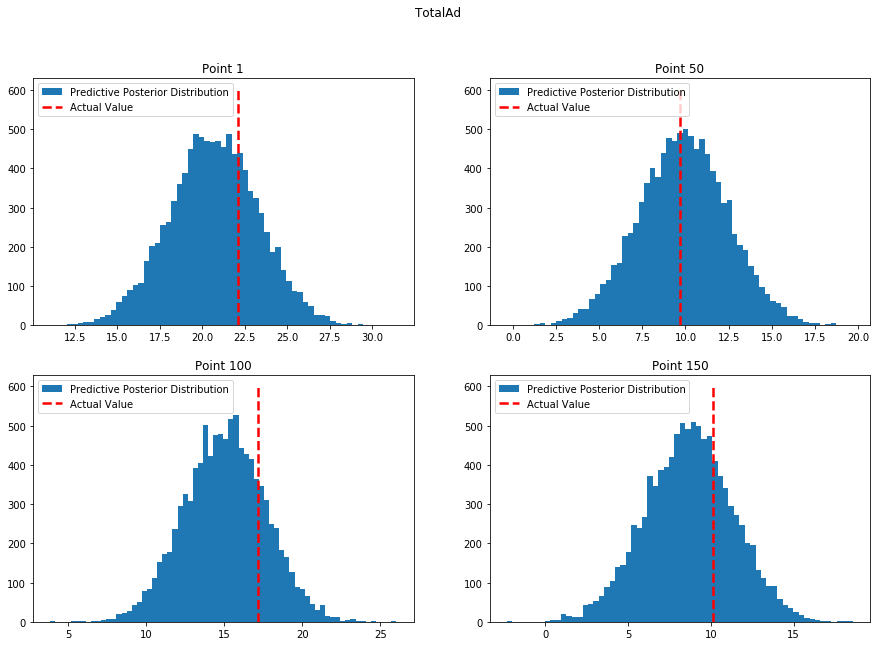

In [32]:
Index = np.array([0,49,99,149])
List = ['Point 1', 'Point 50', 'Point 100', 'Point 150']
Y = np.array(Advertisement[Response])
X = np.array(Advertisement[Columns[3]])
# Function to plot predictive posterior distribution for Bayesian Linear Regression
plt.figure(figsize=(15,10))
for i in range(4):
    X_train = np.delete(X,Index[i])
    Y_train = np.delete(Y,Index[i])
    X_test = X[Index[i]]
    Y_test = Y[Index[i]]
    data = dict(x=X_train, y=Y_train)
    with Model() as model:
        glm.GLM.from_formula('y ~ x', data)
        trace = sample(500, cores=2)  # draw posterior samples using NUTS sampling
    var_dict = {}
    for variable in trace.varnames:
        var_dict[variable] = trace[variable]  
    var_weights = pd.DataFrame(var_dict) 
    sd_value = var_weights['sd'].mean()
    var_weights = np.array(var_weights)
    Inter = np.mean(np.array(var_weights[:,0]))
    Slope = np.mean(np.array(var_weights[:,1]))
    Ymean = Inter+Slope*X_test
    Y_simulated = np.random.normal(loc = Ymean, scale = sd_value,
                                 size = 10000)
    plt.subplot(2,2,i+1)
    plt.hist(Y_simulated, bins='auto', label='Predictive Posterior Distribution')
    plt.vlines(x = Y_test, ymin = 0, ymax = 600, linestyles = '--', colors = 'red',label = 'Actual Value',linewidth = 2.5)
    plt.title(List[i])
    plt.legend(loc='upper left')
plt.suptitle(Columns[3])
plt.show()

### Bootstrap on OLS

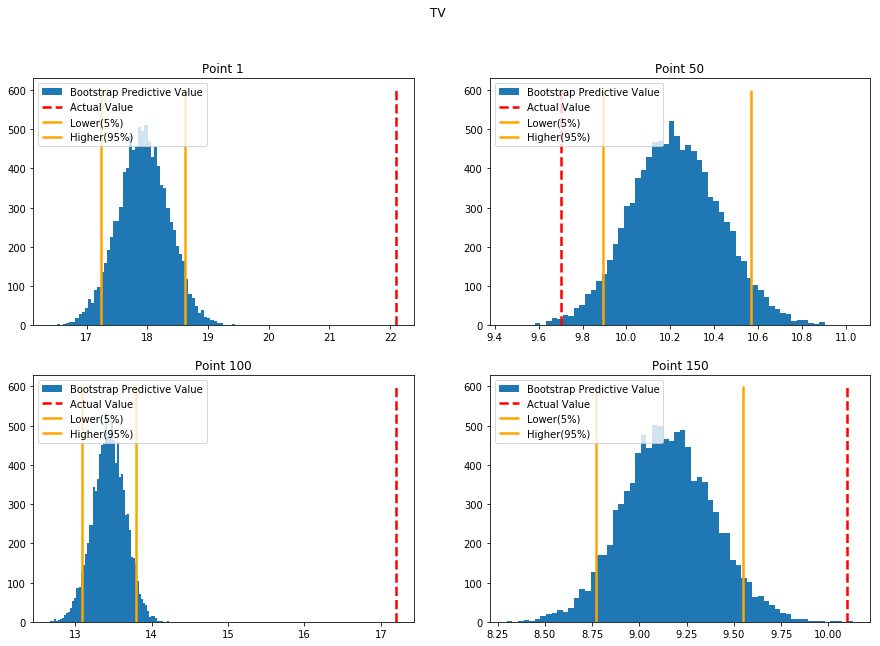

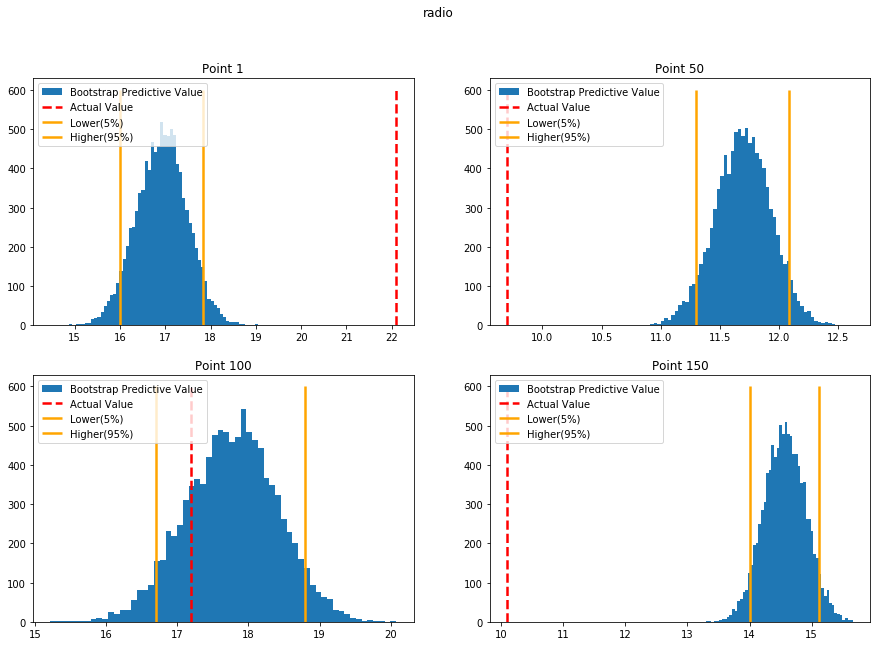

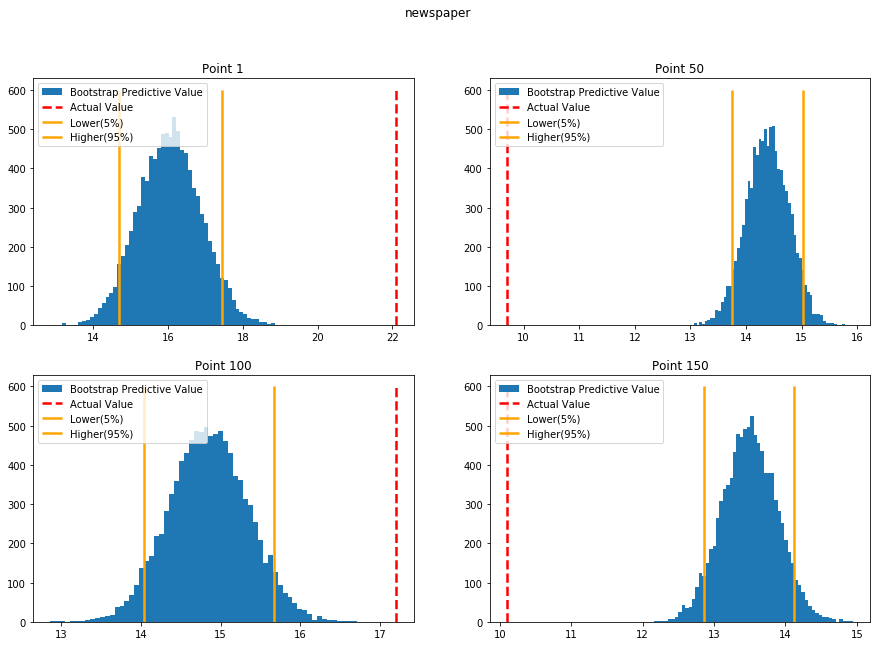

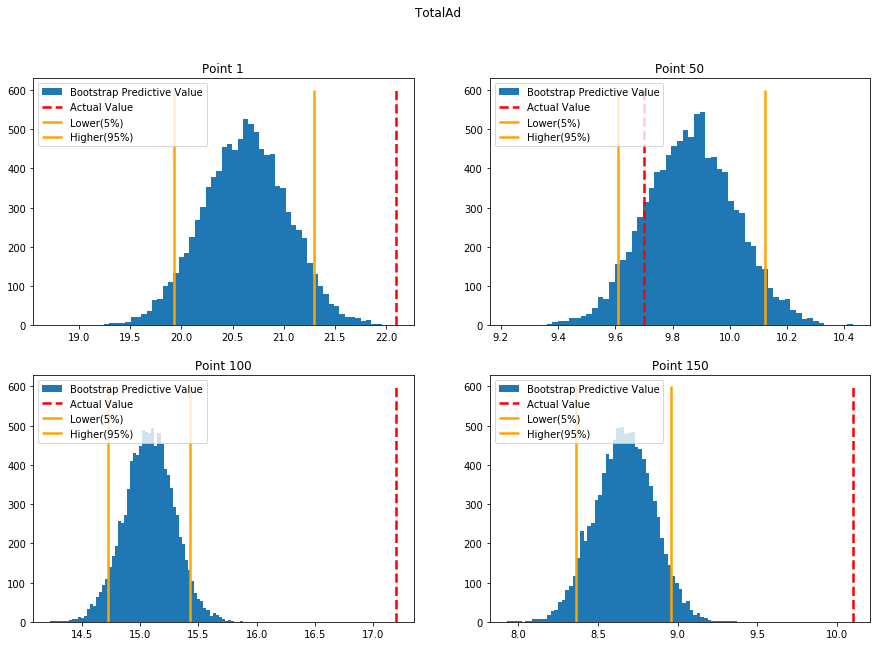

In [47]:
Index = np.array([0,49,99,149])
List = ['Point 1', 'Point 50', 'Point 100', 'Point 150']
Y = np.array(Advertisement[Response])
for i in range(4):
    X = np.array(Advertisement[Columns[i]])
    plt.figure(figsize=(15,10))
    for j in range(4):
        X_train = np.delete(X,Index[j])
        Y_train = np.delete(Y,Index[j])
        X_test = X[Index[j]]
        Y_test = Y[Index[j]]
        n_estimators = 10000
        model = BaggingRegressor(LinearRegression(), n_estimators=n_estimators,bootstrap=True)
        model.fit(X=X_train.reshape(len(X_train),1),y=Y_train)
        Y_simulated = np.zeros(n_estimators)
        k = 0
        for m in model.estimators_:
            Y_simulated[k] = m.predict(X_test.reshape(1,-1))
            k = k+1
        Lower =  np.percentile(Y_simulated, 5)
        Higher = np.percentile(Y_simulated, 95)
        plt.subplot(2,2,j+1)
        plt.hist(Y_simulated, bins='auto', label='Bootstrap Predictive Value')
        plt.vlines(x = Y_test, ymin = 0, ymax = 600, linestyles = '--', colors = 'red',label = 'Actual Value',linewidth = 2.5)
        plt.vlines(x = Lower, ymin = 0, ymax = 600, linestyles = '-', colors = 'orange',label = 'Lower(5%)',linewidth = 2.5)
        plt.vlines(x = Higher, ymin = 0, ymax = 600, linestyles = '-', colors = 'orange',label = 'Higher(95%)',linewidth = 2.5)
        plt.title(List[j])
        plt.legend(loc='upper left')
    plt.suptitle(Columns[i])
    plt.show()

## Question 2

As in the Gaussian Mixture Model case, the Multinomial Mixture Model can also be viewed as an equivalent generative model with explicit latent variables. The procedures for MMM are shown below: 

Suppose there are k multinomial distributions and each multinomial distribution can take c different values.
1. Draw latent indicators $z_i$ where $z_i$ $\overset{\text{iid}}{\sim}$ $Mult(\pi)$ and $z_i \in \{1,...,k\}$. $\mathbf{\pi} = (\pi_1,...,\pi_k)$ is a point on K dimensional simplex that satisfies $\sum_{j=1}^{k} \pi_j=1$ and $\pi_j \in[0,1]$.
2. Given each $z_i$, $x_i$ is drawn independently from a specific multinomial distribution.
\begin{equation}
x_i|z_i=j \overset{\text{iid}}{\sim} Mult(\mathbf{\theta_j})
\end{equation}
$\mathbf{\theta_j}$ is the parameter for multinomial distribution j and $\mathbf{\theta_j}=(\theta_{j,1},...,\theta_{j,c})$ 

In this question, $k=7$, $c=4$ and $x_i \in \{1, 2, 3, 4\}$.

Since $z_i$ is the latent variable, parameter estimation based on maximizing the log-likelihood won't work and EM algorithm should be used. 

Let $\mathbf{\theta_{1:7}}$ denote $(\mathbf{\theta_1,...,\theta_7})$.

The log-likelihood given the observed data is: 
\begin{equation}
\log{f(x_1,...,x_n;\mathbf{\pi},\mathbf{\theta_{1:7}})}=
\sum_{i=1}^{n} \log{\Big[\sum_{j=1}^{7} \pi_j f(x_i;\mathbf{\theta_{j}})\Big]}
\end{equation}

The complete log-likelihood assuming we have obeserved the latent variable is:
\begin{equation}
\sum_{i=1}^{n} \log{f(x_i,z_i;\mathbf{\theta_{1:7}})}
\end{equation}

Let $\Theta$ denotes all parameters we want to estimate ($\mathbf{\pi}$ and $\mathbf{\theta_{1:7}}$). Let $r_{ij}^{(t)}$ denotes the probability that $x_i$ belongs to the jth multinomial distribution at iteration t.

The expected completed log-likelihood is:
\begin{equation}
Q(\Theta^{(t)})=\sum_{i=1}^{n}\sum_{j=1}^{7}\{r_{ij}^{(t)}\log(\pi_j)+r_{ij}^{(t)}log{p(x_i|\mathbf{\theta_{j}})} \}
\end{equation}

E step； Compute the expected sufficient statistic of $z_i$
\begin{equation}
r_{ij}^{(t)} = E_{\Theta^{(t)}} \big[z_i^{j}\big]\\
r_{ij}^{(t)} = Pr(z_i=j|\mathbf{\pi}^{(t)},\mathbf{\theta_{1:7}}^{(t)},x_i)\\
r_{ij}^{(t)} \propto Pr(z_i=j|\mathbf{\pi}^{(t)})Pr(x_i|z_i=j,\mathbf{\theta_{j}}^{(t)})\\
r_{ij}^{(t)} \propto \pi_{j}^{(t)} \prod_{c=1}^{4}\theta_{j,c}^{(t)\mathbf{1}_{x_i=c}}
\end{equation}

Then, after normalizing, we have $r_{ij}^{(t)}$:
\begin{equation}
r_{ij}^{(t)}=\frac{\pi_{j}^{(t)} \prod_{c=1}^{4}\theta_{j,c}^{(t)\mathbf{1}_{x_i=c}}}{\sum_{j=1}^{7}\pi_{j}^{(t)}\prod_{c=1}^{4}\theta_{j,c}^{(t)\mathbf{1}_{x_i=c}}}
\end{equation}

M step: Given the expected completed log-likelihood is above:



Our updated parameters should be:$\Theta^{(t+1)} = argmax(Q(\Theta^{(t)})$

After setting up the Lagrangian form and letting the partial derivatives to be zero will yield the updated parameters as below:
\begin{equation}
\pi_{j}^{(t+1)} = \frac{ \sum_{i=1}^n r_{ij}^{(t)}}{n}\\
\theta_{j,c}^{(t+1)} =\frac{ \sum_{i=1}^n r_{ij}^{(t)}\mathbf{1}_{x_i=c}}{\sum_{i=1}^n r_{ij}^{(t)}}
\end{equation}




## Question 3

In [15]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Considering there are limited data samples for galss type 5 and 6, I combine type 1,2,3 glass as Window and type 5,6,7 as household just like the solution for HW.

In [16]:
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household
id,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0


Type: Household


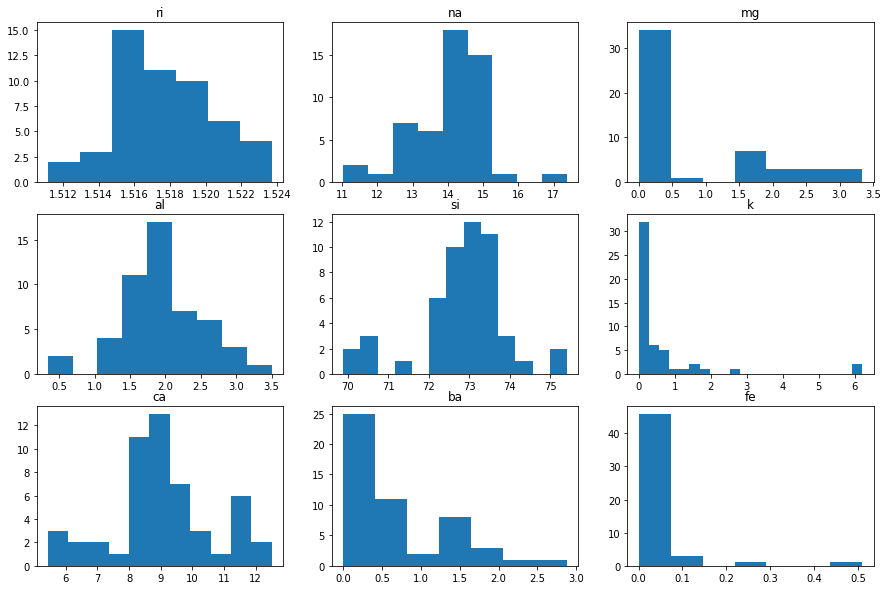

In [18]:
glass_sub = glass[glass['household'] == 1]
glass_sub[['ri','na','mg','al','si','k','ca','ba','fe']].describe()
print('Type: Household')
plt.figure(figsize=(15,10))
for j in range(9):
    plt.subplot(3, 3, j + 1)
    plt.hist(glass_sub[col_names[j + 1]], bins='auto')
    plt.title(col_names[j + 1])
plt.show()


Type: Window


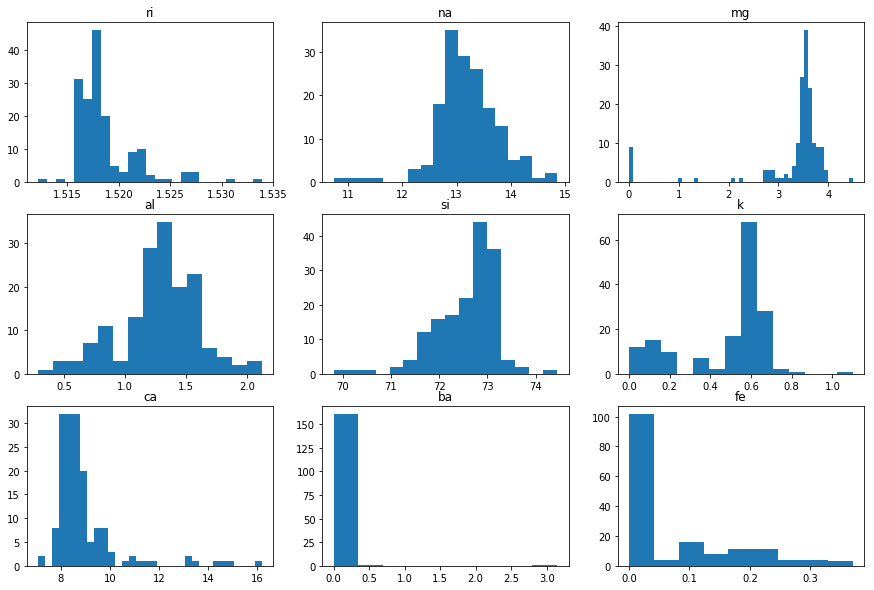

In [19]:
glass_sub = glass[glass['household'] == 0]
glass_sub[['ri','na','mg','al','si','k','ca','ba','fe']].describe()
print('Type: Window')
plt.figure(figsize=(15,10))
for j in range(9):
    plt.subplot(3, 3, j + 1)
    plt.hist(glass_sub[col_names[j + 1]], bins='auto')
    plt.title(col_names[j + 1])
plt.show()

### SVM VS. Regularized Logistic Regression

In [22]:
# Data Proprecessing
X = glass[['ri','na','mg','al','si','k','ca','ba','fe']]
Y = glass['household']
X = preprocessing.scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=2019)

In [24]:
# SVM
svm = SVC()
C_range = 10. ** np.arange(-3, 8)
gamma_range = 10. ** np.arange(-5, 4)
param_grid = dict(gamma=gamma_range, C=C_range)
svm_cv = GridSearchCV(SVC(), param_grid=param_grid, cv=10)
svm_cv.fit(X_train,Y_train)
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)
svm_best=SVC(C=10.0,gamma=0.1)
svm_best.fit(X_train,Y_train)
print("Prediction Accuracy",svm_best.score(X_test,Y_test))

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'gamma': 0.1}
accuracy : 0.9532163742690059
Prediction Accuracy 0.8604651162790697


In [25]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(solver = 'liblinear', max_iter=1000)
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,Y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)
logreg2=LogisticRegression(C=0.001,penalty="l2",solver = 'liblinear',max_iter=1000)
logreg2.fit(X_train,Y_train)
print("Prediction Accuracy",logreg2.score(X_test,Y_test))


tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.935672514619883
Prediction Accuracy 0.9302325581395349


## Question 4

The proof for the fact that EM algorithm does not decrease with respect to the likelihood value at each step is shown below: (I followed the same procedures that are shown in book "The Elements of Statistical Learning", page 272.) 

Let $Z$ denotes the observed data and $Z^m$ denotes the latent or missing data. The complete data is $T=(Z,Z^m)$. The observed data $Z$ has log-likelihood $l(\theta;Z)$, depending on parameters $\theta$. The complete data $T$ has log-likelihood $l_{0}(\theta;Z)$, which is based on the complete density. We further define likelihood $l_{1}$, which is based on the conditional density $Pr(Z^m|Z,\theta^{'})$. The conditional probability leads to the following equations:


\begin{equation}
Pr(Z^m|Z,\theta^{'}) = \frac{Pr(Z^m,Z|\theta^{'})}{Pr(Z|\theta^{'})}\\
Pr(Z|\theta^{'}) =\frac{Pr(T|\theta^{'})}{Pr(Z^m,Z|\theta^{'})}
\end{equation}


In terms of log-likelihoods, we have:

\begin{equation}
l(\theta^{'};Z)=l_{0}(\theta^{'};T)-l_{1}(\theta^{'};Z^m|Z)
\end{equation}

Take conditional expectations with respect to the distribution of $T|Z$ governed by parameter $\theta$ gives:

\begin{equation}
l(\theta^{'};Z)=E[l_{0}(\theta^{'};T)|Z,\theta]-E[l_{1}(\theta^{'};Z^m|Z)|Z,\theta]\\
\equiv Q(\theta^{'},\theta) -R(\theta^{'},\theta)
\end{equation}

EM algorithm will maximize $Q(\theta^{'},\theta)$ rather than the actual objective function $l(\theta^{'};Z)$ over $\theta^{'}$ in the M step. But it will succeed in maximizing $l(\theta^{'};Z)$. The reason is that $R(\theta^{*},\theta)$ is the expectation of a log-likelihood of a density (indexed by $\theta^{*}$), with respect to the same density indexed by $\theta$. And hence by Jensen's inequality, $R(\theta^{*},\theta)$ is maximized as a function of $\theta^{*}$, when $\theta^{*}=\theta$. So if $\theta^{'}$ maximizes $Q(\theta^{'},\theta)$, we can see that:

\begin{equation}
l(\theta^{'};Z)-l(\theta;Z)=[Q(\theta^{'},\theta) -Q(\theta,\theta)]-[R(\theta^{'},\theta)-R(\theta,\theta)] \ \geq 0
\end{equation}

Therefore EM iteration never decreases the log-likelihood.

## Question 5

In page 73 of "The Elements of Statistical Learning", the nature of Least angle regression is discussed. Least angle regression first identifies the variable most correlated with the response. Rather than fit this variable completely, LAR moves the coefficient of this variable continuously toward its least-squares value (causing its correlation with the evolving residual to decrease in absolute value). As soon as another variable "catch up" in terms of correlation with the residual, the process is paused. The second variable then joins the active set, and their coefficients are moved together in a way that keeps their correlations tied and decreasing. This process is continued until all the variables are in the model, and ends at the full least-square fit.

To conclude, Least angle regression algorithm includes the following steps:

1. Start with all coefficients $b_j$ equal to zero.
2. Find the predictor $x_j$ most correlated with y
3. Increase the coefficient $b_j$ in the direction of the sign of its correlation with y. Take residuals r=y-$\hat{y}$ along the way. Stop when some other predictor xk has as much correlation with r as $x_j$ has.
4. Increase ($b_j$, $b_k$) in their joint least squares direction, until some other predictor xm has as much correlation with the residual r.
5. Continue until: all predictors are in the model

Recall the Forward stepwise regression algorithm:

1. Start with all coefficients $b_j$ equal to zero.
2. Find the predictor $x_j$ most correlated with y, and add it into the model. Take residuals r= y-$\hat{y}$.
3. Continue, at each stage adding to the model the predictor most correlated with r. Until: all predictors are in the model

We can see Forward stepwise regression and Least angle regression follow the same general scheme, but Least angle regression doesn't add a predictor fully into the model. The coefficient of that predictor is increased only until that predictor is no longer the one most correlated with the residual r. Then some other competing predictor is then included. The algorithm of Least angle regression suggests it implements a form of sparse regression. 


We can also plot the regularization path of LAR algorithm on some real data to see its sparse regression nature.

Computing regularization path using the LARS
.

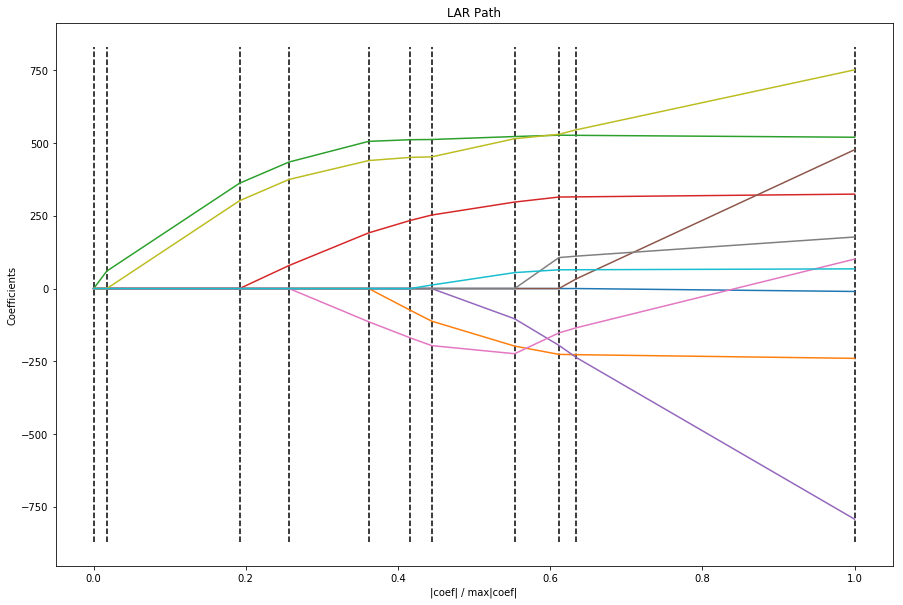

In [5]:
# Import Diabetes data set from sklearn to demonstrate the regularization path of LAR 
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

print("Computing regularization path using the LARS")
_, _, coefs = lars_path(X, y, method='lar', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(15,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LAR Path')
plt.axis('tight')
plt.show()

## Question 6

### Generate Components

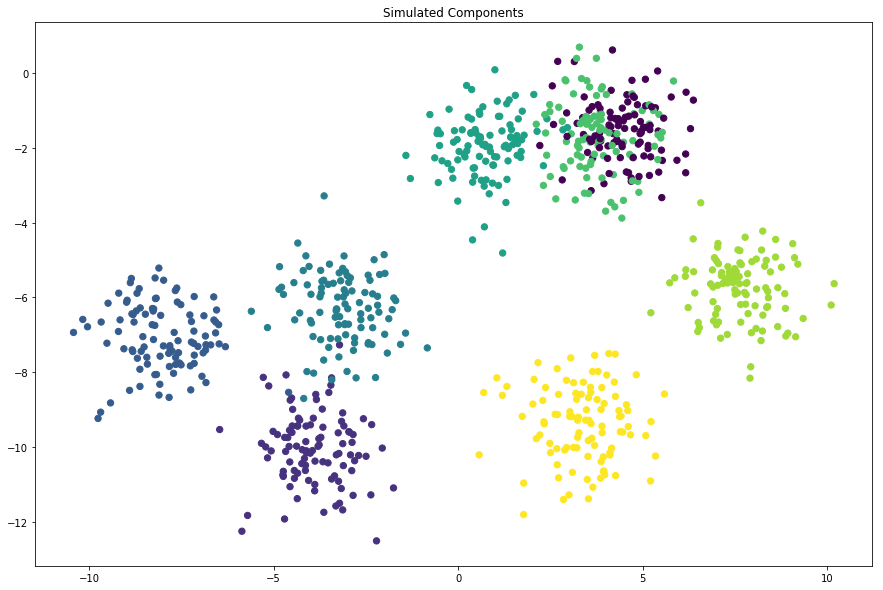

In [12]:
X, y_true = make_blobs(n_samples=800, centers=8,
                       cluster_std=0.90, random_state=1)
X = X[:, ::-1] 
plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=40, cmap='viridis')
plt.title('Simulated Components')
plt.show()

### GMM Probability Assignment


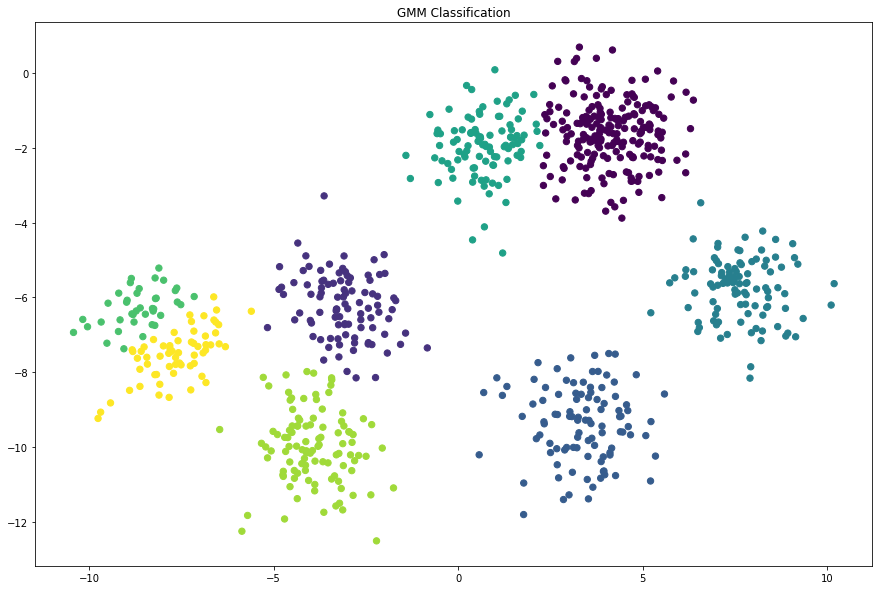

In [11]:
gmm = mixture.GaussianMixture(n_components=8).fit(X)
labels = gmm.predict(X)
plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
plt.title('GMM Classification')
plt.show()

In [13]:
probs = gmm.predict_proba(X)
print('GMM Probability Assignment for Each Observation')
for i in range(len(probs)):
 print(probs[i,:].round(3))

GMM Probability Assignment for Each Observation
[0. 0. 0. 0. 0. 1. 0. 0.]
[0.    0.    0.    0.    0.    0.006 0.    0.994]
[0.    0.004 0.    0.    0.    0.    0.996 0.   ]
[0. 0. 0. 0. 0. 0. 0. 1.]
[0.    0.998 0.    0.    0.    0.    0.002 0.   ]
[0.999 0.    0.    0.    0.001 0.    0.    0.   ]
[0.    0.999 0.    0.    0.    0.    0.    0.001]
[0.    0.    0.    0.    0.    0.005 0.    0.995]
[0.    0.001 0.    0.    0.    0.    0.999 0.   ]
[0. 1. 0. 0. 0. 0. 0. 0.]
[0.996 0.    0.    0.    0.004 0.    0.    0.   ]
[1. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1.]
[0.001 0.    0.    0.    0.999 0.    0.    0.   ]
[0.928 0.    0.    0.    0.072 0.    0.    0.   ]
[0.954 0.    0.    0.    0.046 0.    0.    0.   ]
[0. 0. 0. 0. 0. 0. 1. 0.]
[0.998 0.    0.    0.    0.002 0.    0.    0.   ]
[0.938 0.    0.    0.    0.062 0.    0.    0.   ]
[0. 0. 1. 0. 0. 0. 0. 0.]
[0.    0.001 0.    0.    0.    0.    0.999 0.   ]
[0. 0. 0. 0. 0. 0. 1. 0.]
[0.998 0.    0.   

### Soft VS. Hard Assignment

In classification problem, soft assignment makes probabilistic assignments of points to cluster centers while hard assignment makes deterministic assignments of points to cluster centers. One good example to compare these two assignments can be shown below using K-Means and GMM. 

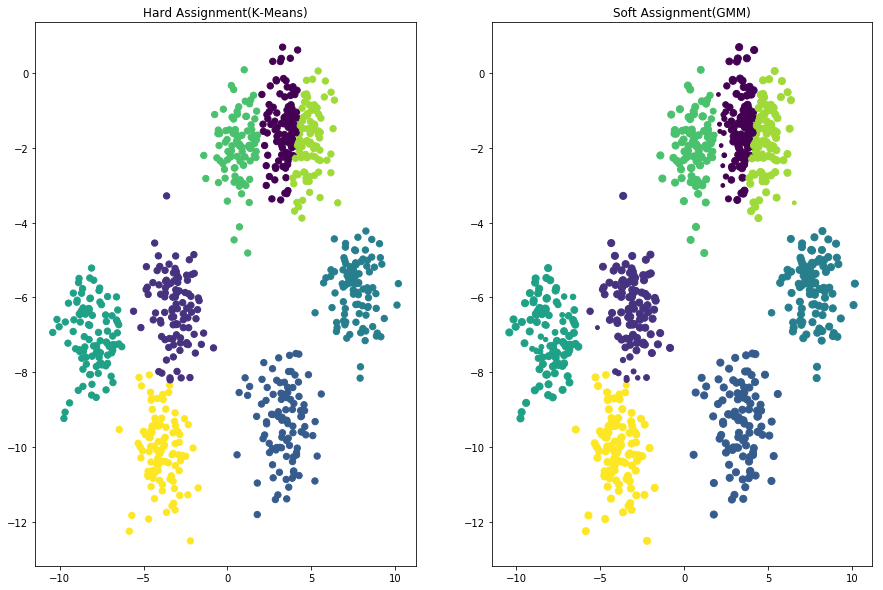

In [15]:
kmeans = KMeans(8, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
plt.title('Hard Assignment(K-Means)')
plt.subplot(1,2,2)
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, s=size, cmap='viridis')
plt.title('Soft Assignment(GMM)')
plt.show()

Even though K-Means and GMM both uses EM algorithm and the classification results are the same. One can see due to the probability nature of GMM, points near the boundaries between different types are smaller because of the uncertainty. 